In [27]:
%matplotlib inline  
import os
import numpy as np
from PIL import Image
import cv2
from matplotlib.pyplot import figure, imshow, savefig
import matplotlib.pyplot as plt
import collections
import os

**Histogram of Pedestrian Bounding Box**

In [46]:
sample_img = 'presentation/bdd_label_id.png'
sample_img_color = 'presentation/bdd_label_color.png'
image = np.array(Image.open(sample_img))
image_color = np.array(Image.open(sample_img_color))

In [47]:
center_x = 420
center_y = 570
size = 224
tl = [center_x - size / 2, center_y - size / 2]
bl = [center_x - size / 2, center_y + size / 2]
br = [center_x + size / 2, center_y + size / 2]
tr = [center_x + size / 2, center_y - size / 2]
points = np.array([tl, bl, br, tr], dtype=np.int32)

In [48]:
line_color = (255, 0, 0)
image_color = cv2.polylines(image_color, [points], True, line_color, 2)

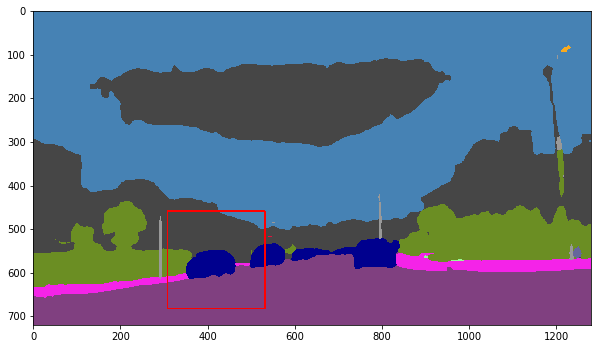

In [49]:
figure(figsize=(10, 10))
imshow(image_color)

In [50]:
left_x = int(center_x - size / 2)
right_x = int(center_x + size / 2)
top_y = int(center_y - size / 2)
bottom_y = int(center_y + size / 2)

In [51]:
labels = {
    0: 'road', 
    1: 'sidewalk',
    2: 'building',
    3: 'wall',
    4: 'fence',
    5: 'pole',
    6: 'traffic light',
    7: 'traffic sign',
    8: 'vegetation',
    9: 'terrain',
    10: 'sky',
    11: 'person',
    12: 'rider',
    13: 'car',
    14: 'truck',
    15: 'bus',
    16: 'train',
    17: 'motorcycle',
    18: 'bicycle',
}


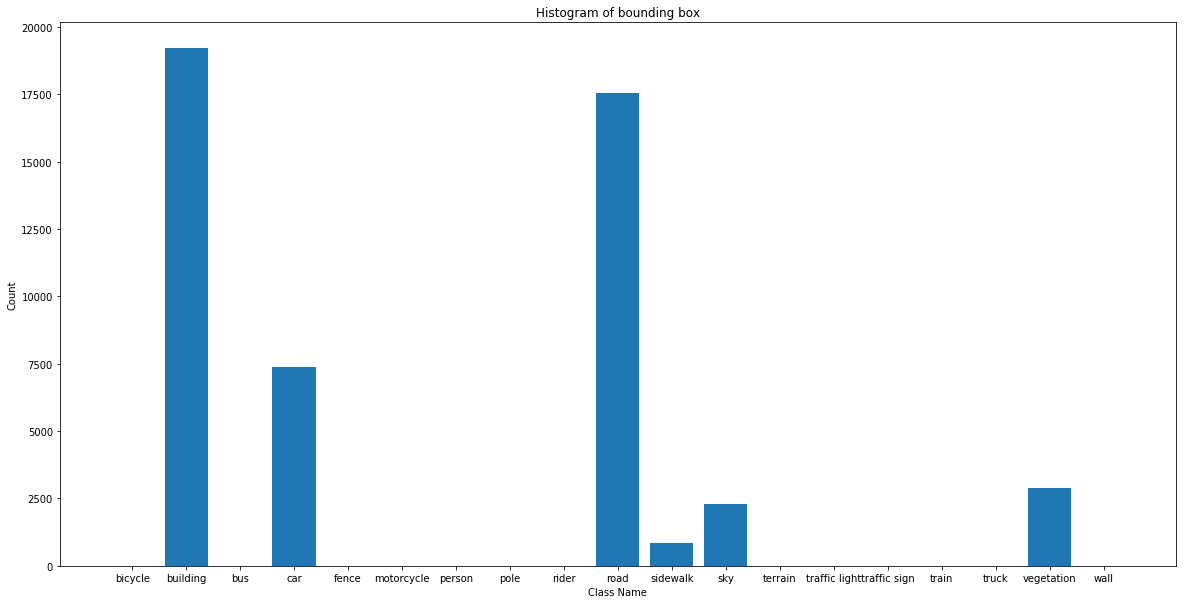

In [52]:
histogram = {}
for key in labels.keys():
    histogram[key] = 0
for y in range(top_y, bottom_y):
    for x in range(left_x, right_x):
        if image[y, x] in histogram:
            histogram[image[y, x]] += 1
names = []
values = []
for key in sorted(histogram.keys()):
    names.append(labels[key])
    values.append(histogram[key])
figure(figsize=(20, 10))
plt.title("Histogram of bounding box")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.bar(names, values)

**Mapillary**

In [ ]:
sample_instance = 'datasets/mapillary/grDzFDON_vntlJOAKJx7qA_instance.png'
sample_label = 'datasets/mapillary/grDzFDON_vntlJOAKJx7qA_label.png'
sample_panoptic = 'datasets/mapillary/grDzFDON_vntlJOAKJx7qA_panoptic.png'
img_instance = np.array(Image.open(sample_instance))
img_label = np.array(Image.open(sample_label))
img_panoptic = np.array(Image.open(sample_panoptic))

What is stored in an instance map: 8 bits of object ids + 8 bits of instance ids

In [2]:
train_images_dir = 'datasets/mapillary/training/images'
train_labels_dir = 'datasets/mapillary/training/train_ids'
val_images_dir = 'datasets/mapillary/validation/images'
val_labels_dir = 'datasets/mapillary/validation/train_ids'
test_images_dir = 'datasets/mapillary/testing/images'
train_images = os.listdir(train_images_dir)
val_images = os.listdir(val_images_dir)

In [ ]:
print("Test training...")
for jpg in train_images:
    image = Image.open(os.path.join(train_images_dir, jpg))
    label = Image.open(os.path.join(train_labels_dir, jpg.split('.')[0] + '.png'))
    if image.width != label.width or image.height != label.height: 
        print("Image:", image.width)
        print("Label:", label.width)

print("Test validation...")
for jpg in val_images:
    image = Image.open(os.path.join(val_images_dir, jpg))
    label = Image.open(os.path.join(val_labels_dir, jpg.split('.')[0] + '.png'))
    if image.width != label.width or image.height != label.height: 
        print("Image:", image.width)
        print("Label:", label.width)
print("Finish test!")

Filter out images that do not have enough crosswalk pixels

After applying threshold=512, we are able to generate: 190 crosswalk masks in training. 23 crosswalk masks in validation.